# Phân tích chỉ số chất lượng không khí (Air Quality Index) của USA

![](https://aihealth.vn/app/uploads/2021/07/AQI-la-gi-2.png)

**Dataset Source:**  https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates  

**Chú thích các đặc trưng trong tập dữ liệu:**   
- **City**: thành phố  
- **AQI**: chỉ số chất lượng không khí  
- **CO**: Carbon Monoxide (chất gây độc cho hệ hô hấp)  
- **PM2.5**: Chỉ số để chỉ các hạt hoặc giọt nhỏ trong không khí có chiều rộng từ 2.5 $\mu$ m trở xuống

![](https://aihealth.vn/app/uploads/2021/07/AQI-la-gi-3.png)

# 1. Khai báo thư viện

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

# 2. Xử lý dữ liệu

#### 2.1. Đọc dữ liệu

In [49]:
df = pd.read_csv("D:/DATA ANALYST/Mind X/III. Data Analysis/Project/Data.csv")

In [50]:
df.dropna(inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16393 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16393 non-null  object 
 2   AQI Value           16393 non-null  int64  
 3   AQI Category        16393 non-null  object 
 4   CO AQI Value        16393 non-null  int64  
 5   CO AQI Category     16393 non-null  object 
 6   Ozone AQI Value     16393 non-null  int64  
 7   Ozone AQI Category  16393 non-null  object 
 8   NO2 AQI Value       16393 non-null  int64  
 9   NO2 AQI Category    16393 non-null  object 
 10  PM2.5 AQI Value     16393 non-null  int64  
 11  PM2.5 AQI Category  16393 non-null  object 
 12  lat                 16393 non-null  float64
 13  lng                 16393 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.9+ MB


In [52]:
df.duplicated().sum()

0

In [53]:
location_col = ['Country']
coordination_col = ['lat', 'lng']
categorical_col = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
numerical_col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# 3. Phân tích khai phá dữ liệu (EDA)

## 3.1. Dữ liệu phân tích là số (numerical)

In [54]:
a = len(df['Country'].unique())
print(f'Thực hiện khảo sát không khí trên {a} quốc gia')

Thực hiện khảo sát không khí trên 174 quốc gia


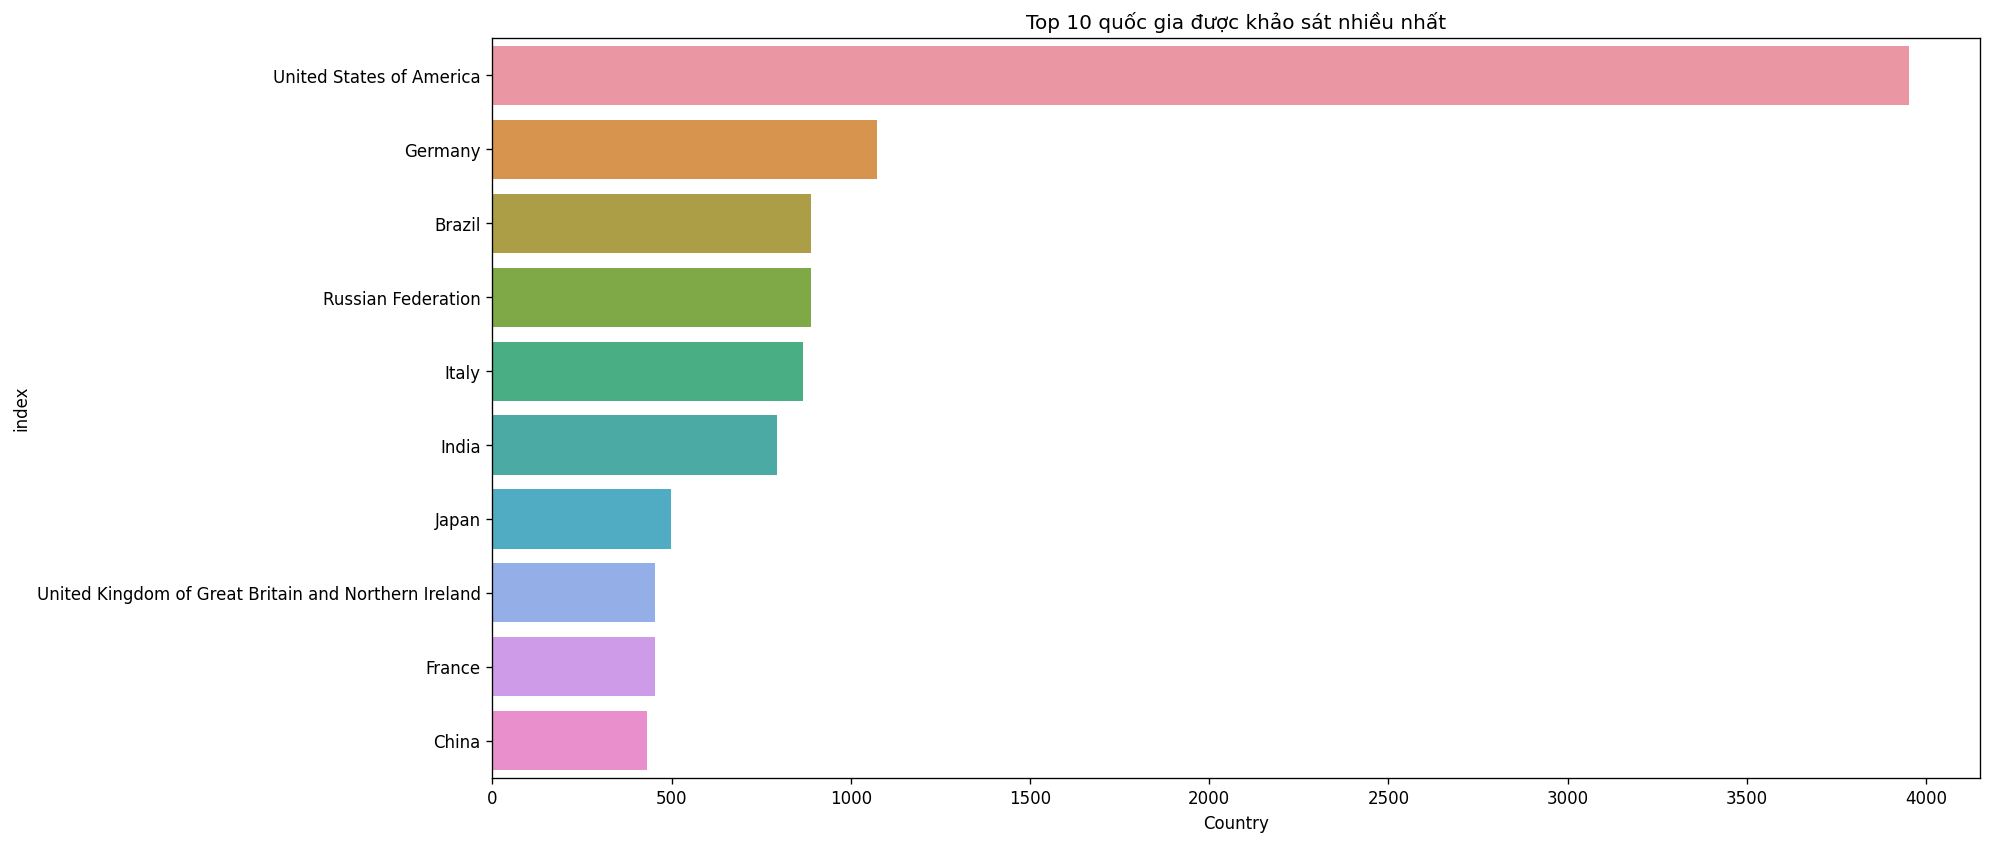

In [55]:
# Assuming df is your DataFrame
plt.figure(figsize=(16, 8))
top_cities = df['Country'].value_counts().sort_values(ascending=False)[:10].reset_index()
sns.barplot(data=top_cities, y='index', x='Country')  # 'City' represents the count column
plt.title('Top 10 quốc gia được khảo sát nhiều nhất')
plt.show()

Text(0, 0.5, 'Latitude')

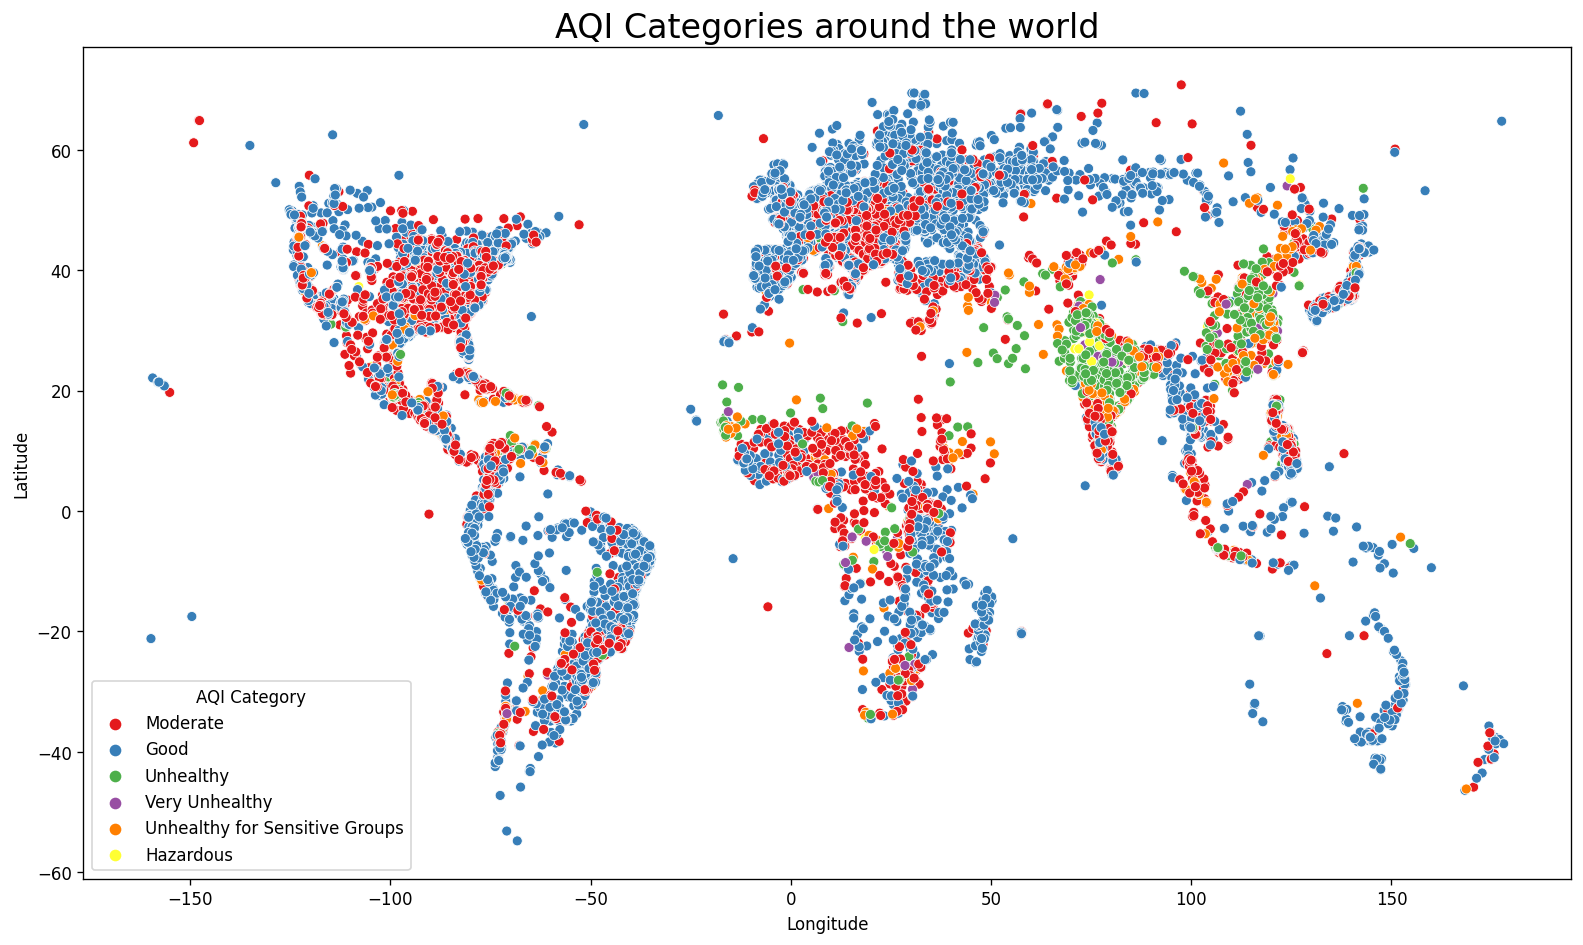

In [56]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='lng',y='lat',hue='AQI Category',palette='Set1')
plt.title('AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#### 3.1.4.Nhận xét dữ liệu các tại các điểm đo đạc

In [57]:
df[numerical_col].describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000
mean,63.227902,1.349356,31.794424,3.851156,60.075520
std,43.297779,2.390045,22.975905,5.911545,43.378779
min,7.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,20.000000,0.000000,34.000000
50%,52.000000,1.000000,29.000000,2.000000,52.000000
75%,69.000000,1.000000,38.000000,5.000000,69.000000
max,500.000000,133.000000,222.000000,91.000000,500.000000


#### 3.1.5.Vẽ biểu đồ Histogram thể hiện phân phối của các tiêu chí đo khác nhau 

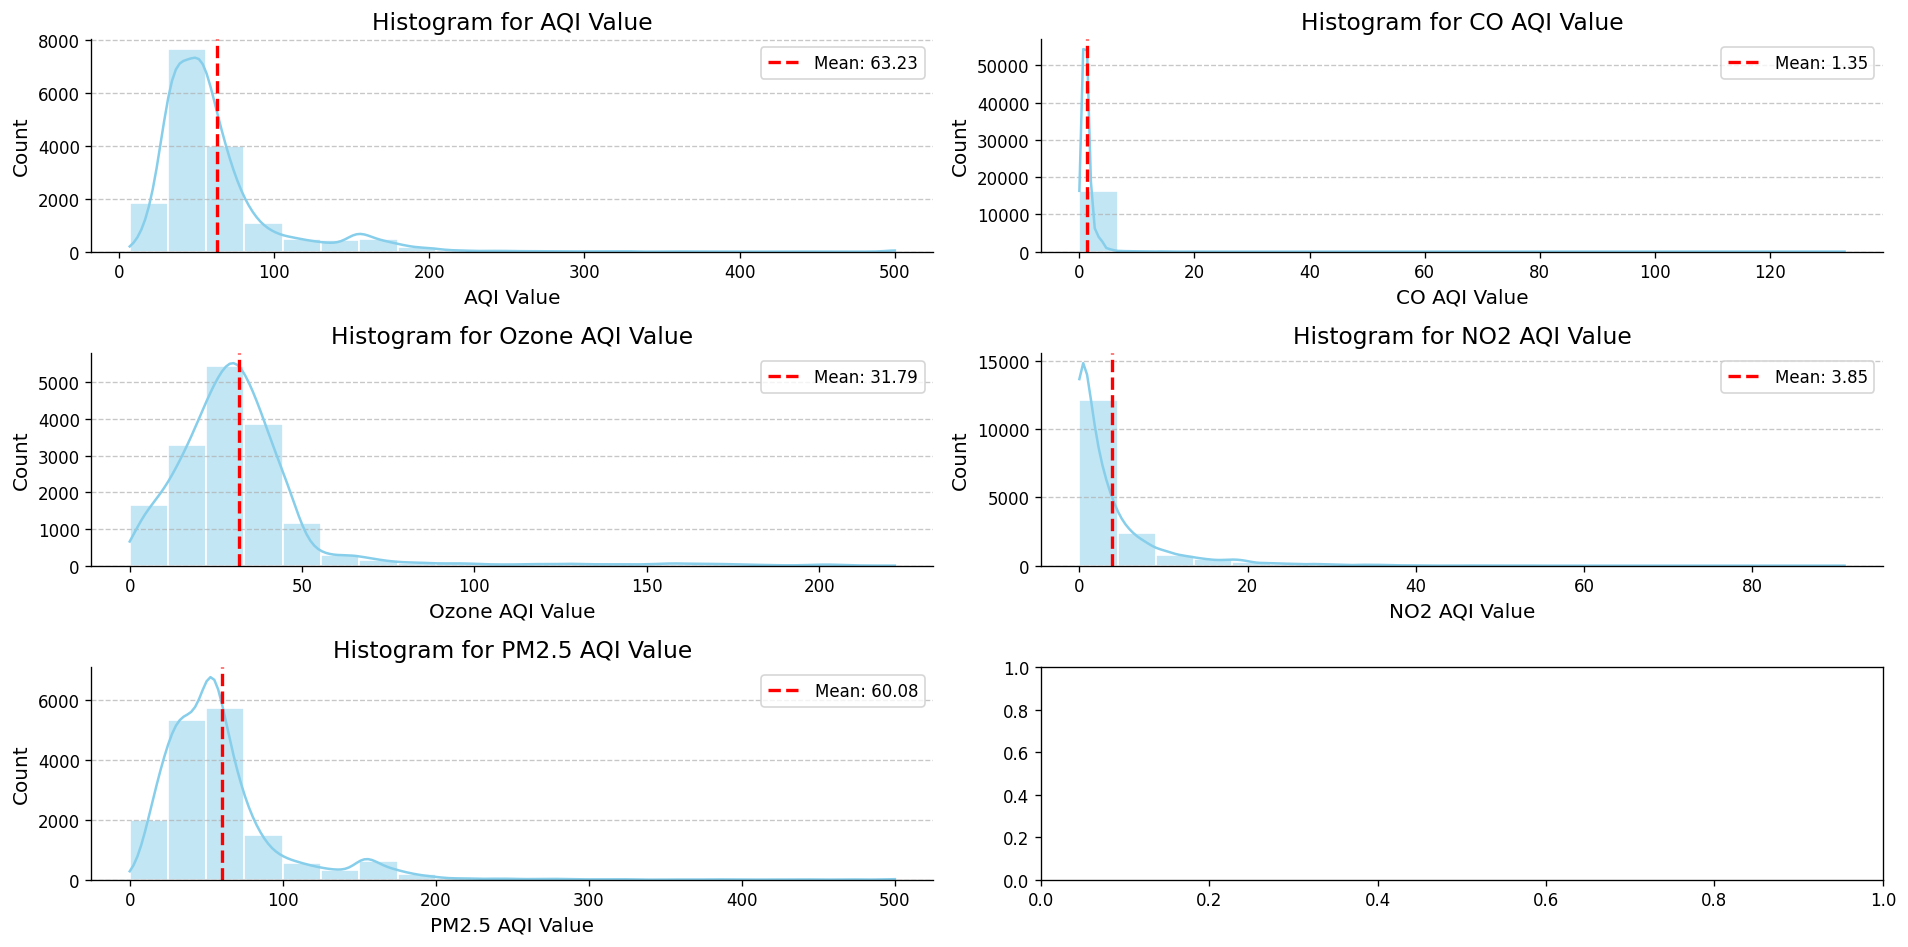

In [58]:
# Set the number of subplots based on the number of eligible columns
eligible_columns = [x for x in df[numerical_col] if df[x].dtype != 'O' and x != 'lat' and x != 'lng']
num_subplots = len(eligible_columns)
# Set the number of columns in the subplot grid
num_cols = 2  # Adjust the number of columns as needed
num_rows = (num_subplots + 1) // num_cols
# Set the overall figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
# Flatten the axes if needed (for handling single-row or single-column subplots)
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)
# Loop through eligible columns and create subplots
for i, x in enumerate(eligible_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    # Use sns.histplot for better customization and aesthetics
    sns.histplot(df[x], kde=True, ax=axes[row_idx, col_idx], color='skyblue', bins=20, edgecolor='white')
    # Customize the subplot
    axes[row_idx, col_idx].set_xlabel(x, fontsize=12)
    axes[row_idx, col_idx].set_ylabel('Count', fontsize=12)
    axes[row_idx, col_idx].set_title(f'Histogram for {x}', fontsize=14)
    # Set grid and style
    axes[row_idx, col_idx].grid(axis='y', linestyle='--', alpha=0.7)
    axes[row_idx, col_idx].spines['right'].set_visible(False)
    axes[row_idx, col_idx].spines['top'].set_visible(False)
    # Add mean line
    mean_val = df[x].mean()
    axes[row_idx, col_idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row_idx, col_idx].legend()
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### 3.1.7. Vẽ biểu đồ bar thể hiện Top 10 quốc gia có giá trị AQI cao nhất

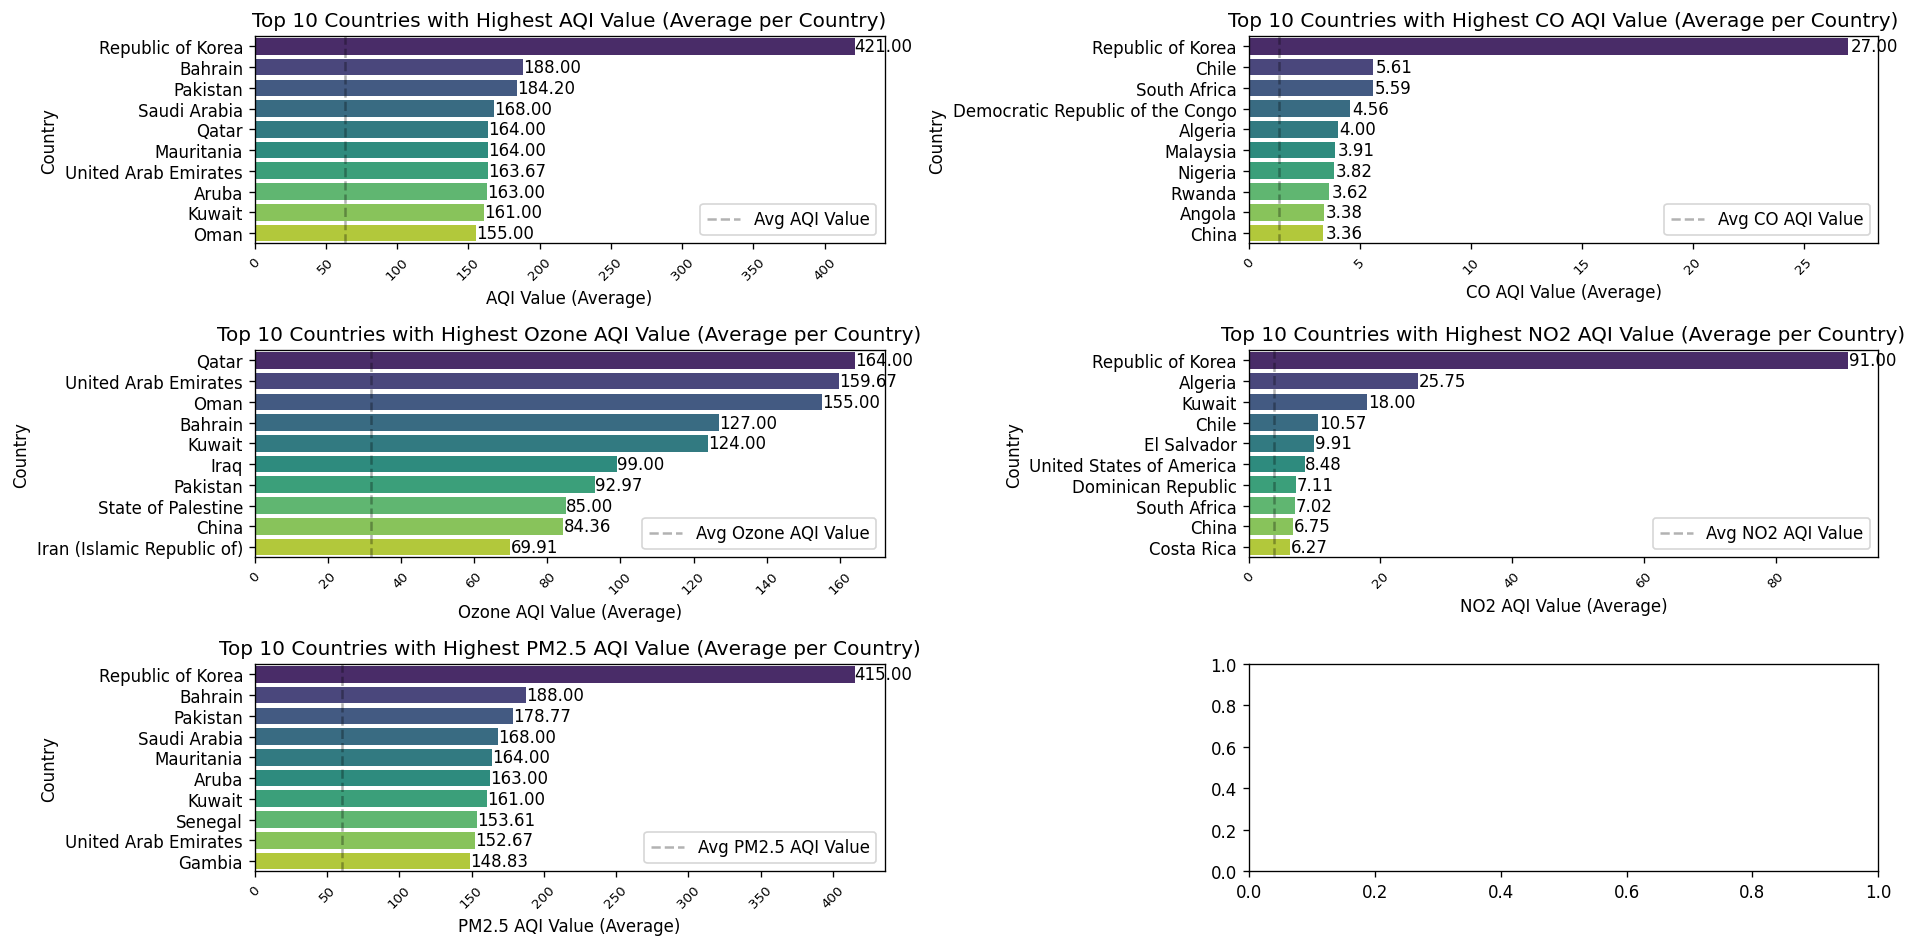

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the number of subplots based on the number of eligible columns
eligible_columns = [x for x in df.columns if df[x].dtype != 'O' and x != 'lat' and x != 'lng']
num_subplots = len(eligible_columns)
# Set the number of columns in the subplot grid
num_cols = 2  # Adjust the number of columns as needed
num_rows = (num_subplots + 1) // num_cols
# Set the overall figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
# Flatten the axes if needed (for handling single-row or single-column subplots)
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)
# Loop through eligible columns and create subplots
for i, x in enumerate(eligible_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    df_grouped = df.groupby('Country')[x].mean().reset_index().sort_values(x, ascending=False)[:10]
    # Set a color palette
    sns.set_palette("viridis")
    # Create a color map based on the values of the x column
    color_map = sns.color_palette("viridis", n_colors=len(df_grouped))
    ax = sns.barplot(ax=axes[row_idx, col_idx], data=df_grouped, x=x, y='Country', palette=color_map)
    # Add a horizontal line for the overall mean
    ax.axvline(df[x].mean(), ls='--', color='black', alpha=0.3, label=f'Avg {x}')
    # Customize the plot
    ax.set_title(f'Top 10 Countries with Highest {x} (Average per Country)', fontsize=12)
    ax.set_xlabel(f'{x} (Average)', fontsize=10)
    ax.set_ylabel('Country', fontsize=10)
    ax.legend()
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', color='black')
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# 4. Hồi quy tuyến tính

<Axes: >

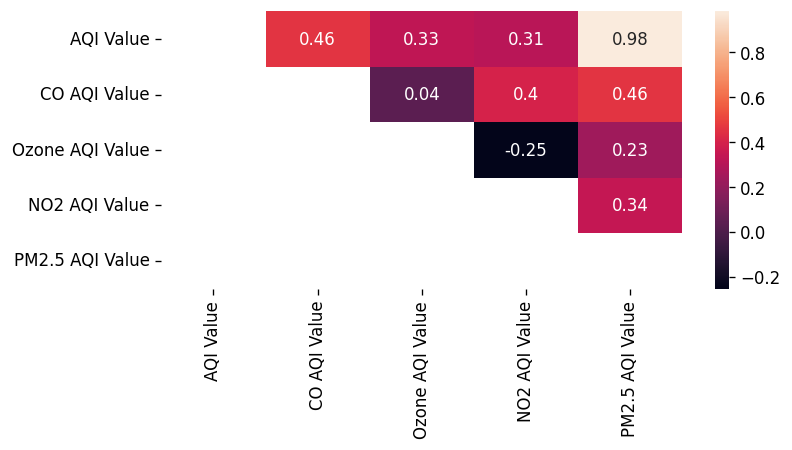

In [60]:
num_df = df[numerical_col]
corr_mat = num_df.corr()

sns.heatmap(data=corr_mat, annot=True, mask=np.tril(corr_mat))

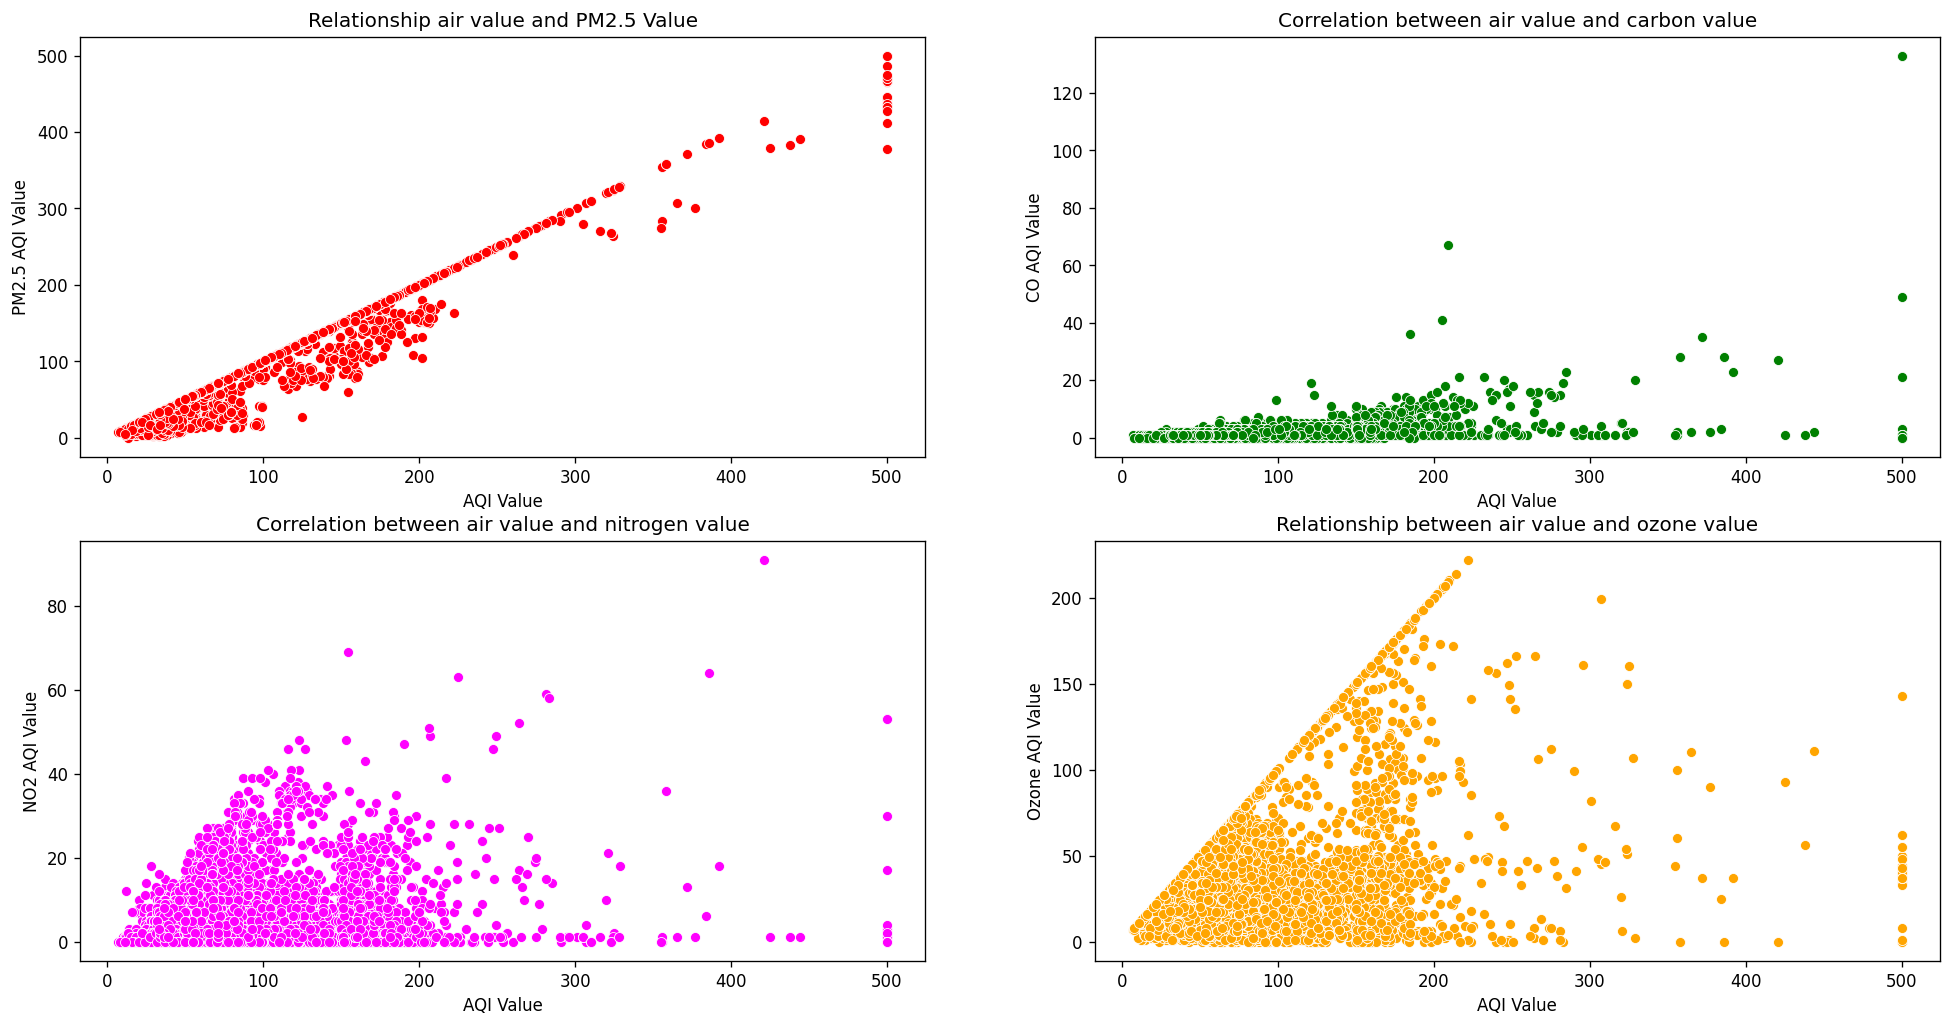

In [61]:
df['CO AQI Category'].replace({'Good':5,'Unhealthy for Sensitive Groups':1,'Moderate':4},inplace = True)
df['Ozone AQI Category'].replace({'Good':5,'Moderate':4,'Unhealthy':3,'Very Unhealthy':2,'Unhealthy for Sensitive Groups':1},inplace = True)
df['NO2 AQI Category'].replace({'Good':5,'Moderate':4},inplace = True)
df['PM2.5 AQI Category'].replace({'Hazardous':0,'Unhealthy for Sensitive Groups':1,'Very Unhealthy':2,'Unhealthy':3,'Moderate':4,'Good':5},inplace = True)

df['CO AQI Category']= df['CO AQI Category'].astype(int)
df['Ozone AQI Categoryy']= df['Ozone AQI Category'].astype(int)
df['NO2 AQI Category']= df['NO2 AQI Category'].astype(int)
df['PM2.5 AQI Category']= df['PM2.5 AQI Category'].astype(int)

fig,axes = plt.subplots(nrows=2,ncols = 2,figsize=(20,10));

sns.scatterplot(ax = axes[0,0],x='AQI Value',y='PM2.5 AQI Value',data = df,color = 'red');
sns.scatterplot(ax = axes[0,1],x='AQI Value',y='CO AQI Value',data = df,color = 'green');
sns.scatterplot(ax = axes[1,0],x='AQI Value',y='NO2 AQI Value',data = df,color = 'Fuchsia');
sns.scatterplot(ax = axes[1,1],x='AQI Value',y='Ozone AQI Value',data = df,color='orange');

axes[0,0].title.set_text('Relationship air value and PM2.5 Value')
axes[0,1].title.set_text('Correlation between air value and carbon value')
axes[1,0].title.set_text('Correlation between air value and nitrogen value')
axes[1,1].title.set_text('Relationship between air value and ozone value')

In [62]:
df.head(3)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng,Ozone AQI Categoryy
0,Russian Federation,Praskoveya,51,Moderate,1,5,36,5,0,5,51,4,44.7444,44.2031,5
1,Brazil,Presidente Dutra,41,Good,1,5,5,5,1,5,41,5,-5.2900,-44.4900,5
2,Brazil,Presidente Dutra,41,Good,1,5,5,5,1,5,41,5,-11.2958,-41.9869,5


In [66]:
X= df.drop(['Country', 'City', 'AQI Value', 'AQI Category', 'lng', 'lat', 'CO AQI Category', 'NO2 AQI Category', 'Ozone AQI Category', 'PM2.5 AQI Category'],axis=1)
y= df['AQI Value']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

#### Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
print('a=',model_lin.coef_)
print('b=',model_lin.intercept_)

a= [0.34109143 0.21218123 0.05083073 0.94171309 0.39119632]
b= -2.6830909413352657


In [69]:
y_pred=model_lin.predict(X_test)
y_pred

array([86.27809472, 63.85604779, 43.04469795, ..., 55.45504273,
       58.38397762, 65.18815046])

In [70]:
from sklearn.metrics import r2_score, mean_squared_error
import math
Ac2=r2_score(y_test, y_pred)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac2))

import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('The accuracy of this model is:RMSE=',"{:.2f}".format(rmse))

The accuracy of this model is:R-square= 0.97
The accuracy of this model is:RMSE= 7.58


#### Decision Tree - BEST

In [71]:
from sklearn import tree
score_total = []
for i in range(1, 20):
    model_tree = tree.DecisionTreeRegressor(max_depth=i)
    model_tree.fit(X_train, y_train)
    y_pred = model_tree.predict(X_test)
    score_total.append(r2_score(y_test, y_pred))

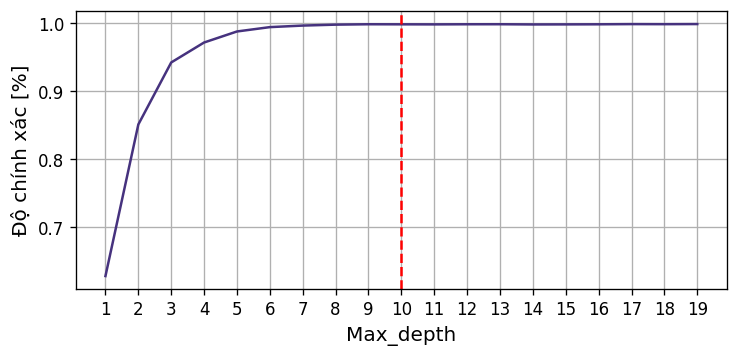

In [72]:
#Vẽ hình thể hiện độ chính xác của max_depth
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
plt.ylabel('Độ chính xác [%]', fontsize=12)
plt.xlabel('Max_depth', fontsize=12)
plt.plot(range(1,20), score_total)
plt.xticks(range(1,20))
plt.axvline(x=10, color='r', linestyle='--')
plt.grid('minor')

In [73]:
model_tree = tree.DecisionTreeRegressor(max_depth=10)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

Ac2=r2_score(y_test, y_pred)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac2))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('The accuracy of this model is:RMSE=',"{:.2f}".format(rmse))

The accuracy of this model is:R-square= 1.00
The accuracy of this model is:RMSE= 1.73


#### Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
score_total_rf = []
for i in range(1, 20):
    rf = RandomForestRegressor(n_estimators=i)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score_total_rf.append(r2_score(y_test, y_pred))

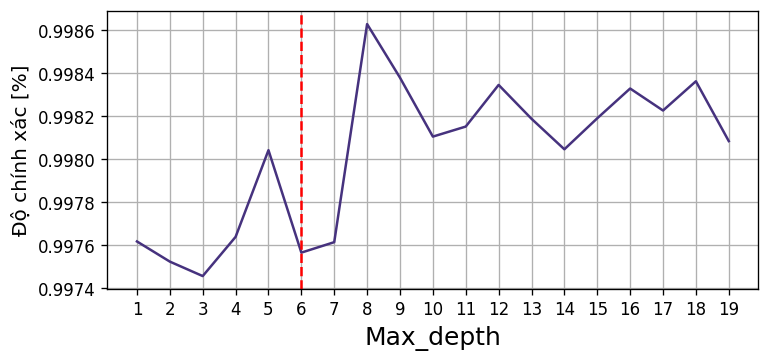

In [75]:
#Vẽ hình thể hiện độ chính xác của max_depth
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
plt.ylabel('Độ chính xác [%]', fontsize=12)
plt.xlabel('Max_depth', fontsize=15)
plt.plot(range(1,20), score_total_rf)
plt.xticks(range(1,20))
plt.axvline(x=6, color='r', linestyle='--')
plt.grid('minor')

In [76]:
rf = RandomForestRegressor(n_estimators=6)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Ac2=r2_score(y_test, y_pred)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac2))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('The accuracy of this model is:RMSE=',"{:.2f}".format(rmse))

The accuracy of this model is:R-square= 1.00
The accuracy of this model is:RMSE= 1.81


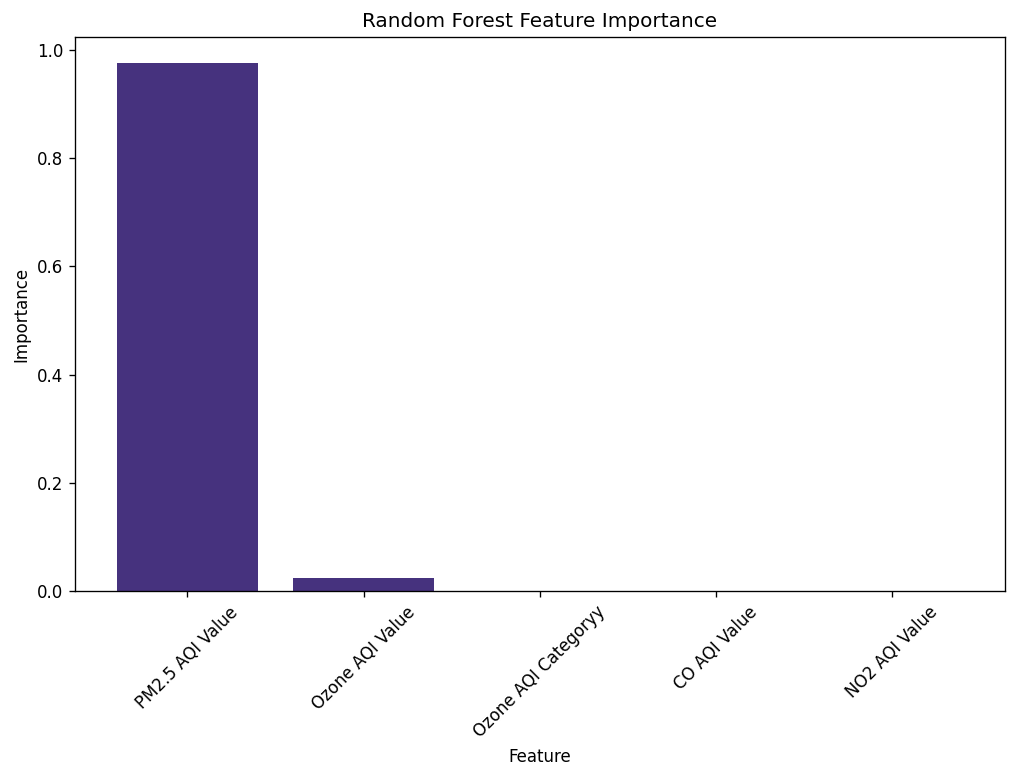

In [77]:
feature_importances = rf.feature_importances_
# Sắp xếp các biến theo mức độ quan trọng giảm dần
sorted_idx = feature_importances.argsort()[::-1]
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), X_train.columns[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

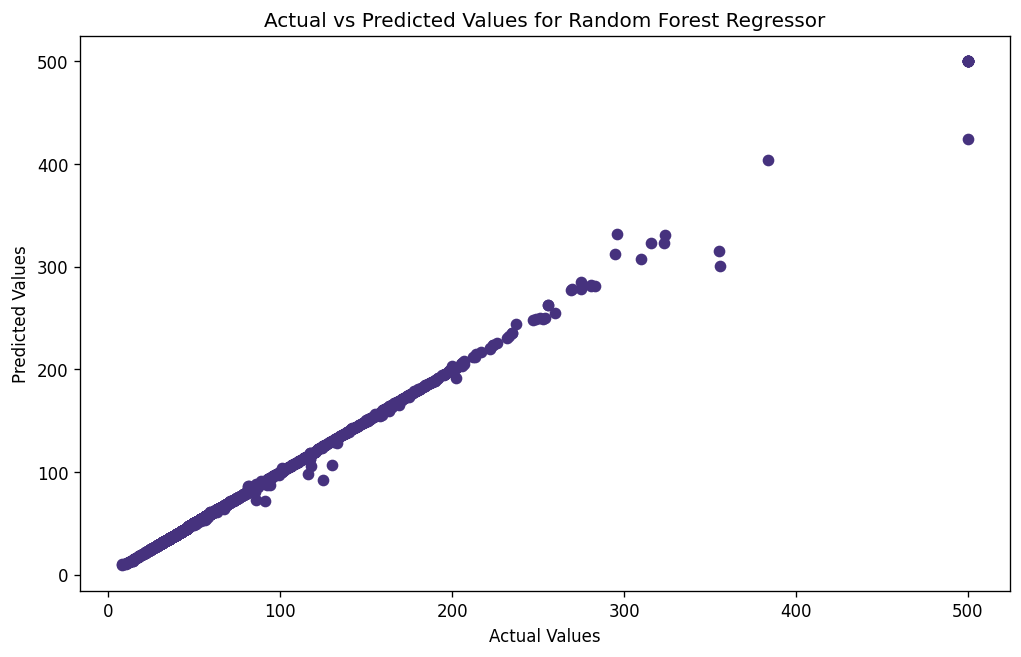

In [78]:
# Dự đoán giá trị trên dữ liệu kiểm tra
predictions = rf.predict(X_test)
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Random Forest Regressor")
plt.show()


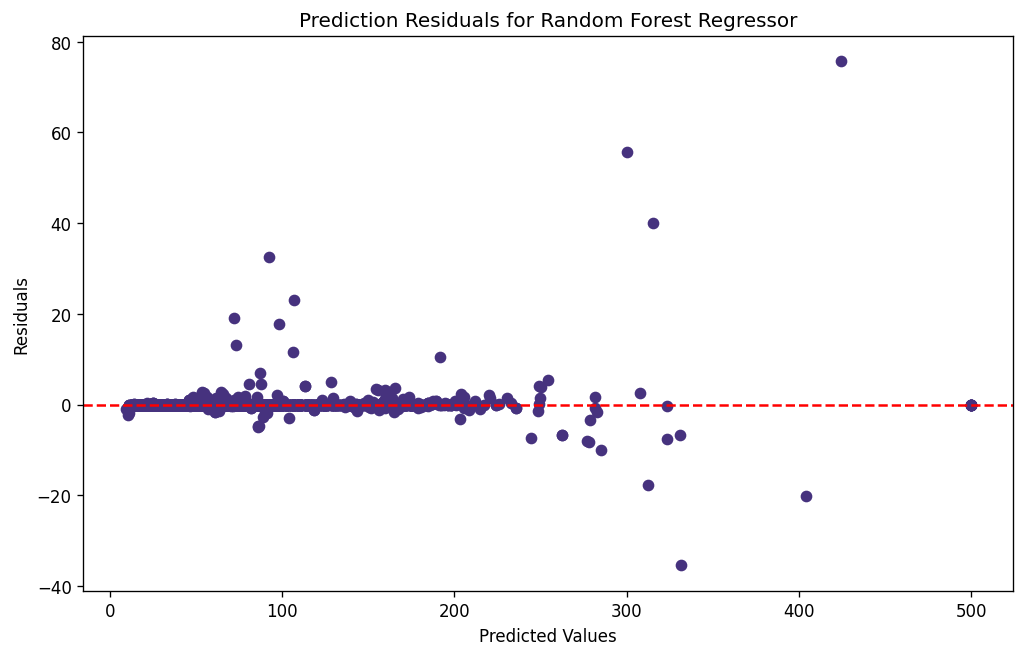

In [79]:
# Tính toán cự li
residuals = y_test - predictions
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Prediction Residuals for Random Forest Regressor")
plt.show()


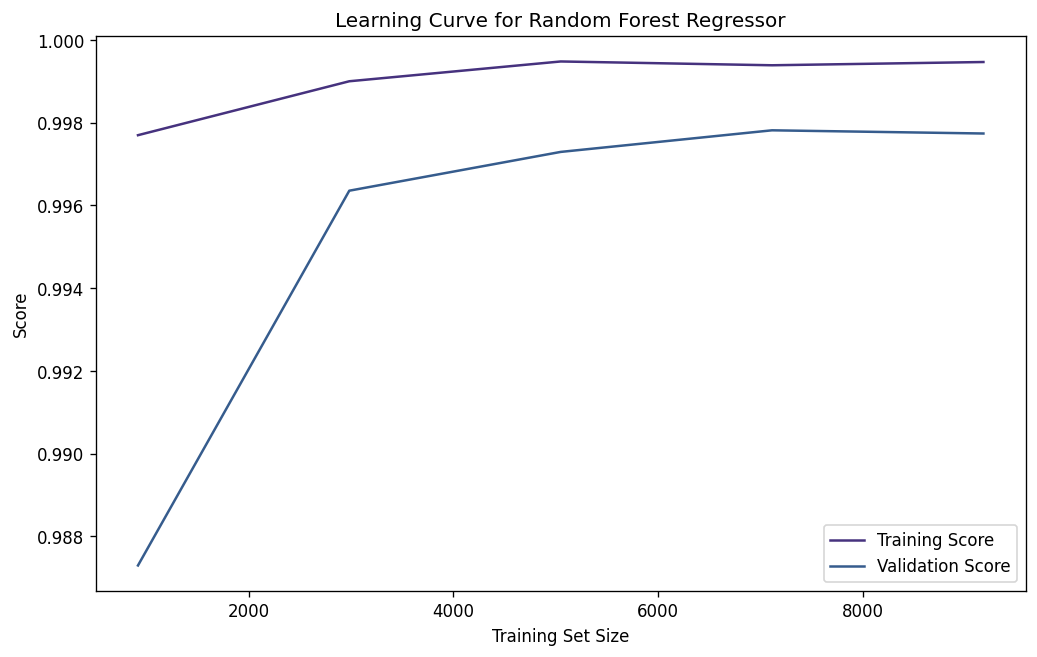

In [80]:
from sklearn.model_selection import learning_curve

# Vẽ biểu đồ đường học
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve for Random Forest Regressor')
plt.legend()
plt.show()


#### KNN Regressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor
ac = []
for i in range(2, 20):
    model_knn = KNeighborsRegressor(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    ac.append(r2_score(y_test, y_pred))

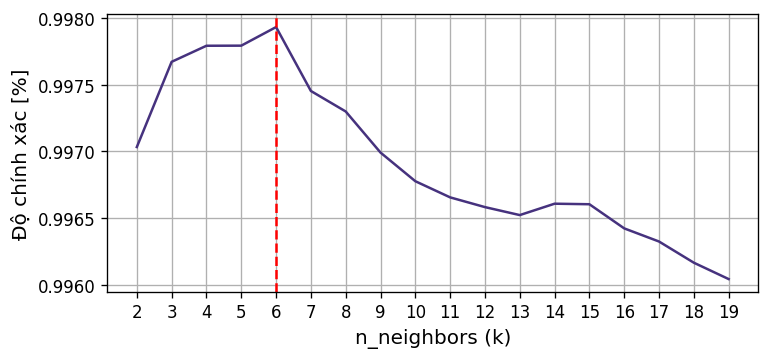

In [85]:
#Vẽ hình thể hiện độ chính xác theo giá trị n_neighbors 
plt.ylabel('Độ chính xác [%]',fontsize=12) 
plt.xlabel('n_neighbors (k)',fontsize=12) 
plt.plot(range(2, 20), ac) 
plt.xticks(range(2, 20)) 
plt.axvline(x=6, color='r', linestyle='--') 
plt.grid('minor')

In [86]:
model_knn = KNeighborsRegressor(n_neighbors=6)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

Ac2=r2_score(y_test, y_pred)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac2))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('The accuracy of this model is:RMSE=',"{:.2f}".format(rmse))

The accuracy of this model is:R-square= 1.00
The accuracy of this model is:RMSE= 1.99
